In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import files
from keras_preprocessing import image
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [ ]:
# print("Farrel")
# farrel_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/traditional/'
# farrel_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/modern/'
# print('Traditional Batik:', len(os.listdir(farrel_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(farrel_modern_source_dir)))

# print("\nDosen")
# dosen_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/traditional/'
# dosen_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/modern/'
# print('Traditional Batik:', len(os.listdir(dosen_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(dosen_modern_source_dir)))

# print("\nAnggun")
# anggun_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/traditional/'
# anggun_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/modern/'
# print('Traditional Batik:', len(os.listdir(anggun_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(anggun_modern_source_dir)))

# print("\nRiqqah")
# riqqah_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/traditional/'
# riqqah_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/modern/'
# print('Traditional Batik:', len(os.listdir(riqqah_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(riqqah_modern_source_dir)))

In [ ]:
# def copy_data(SOURCE, DESTINATION):
#   file_names = os.listdir(SOURCE)

#   for index, file in enumerate(file_names):
#     copyfile(os.path.join(SOURCE, file), os.path.join(DESTINATION, file))

# gdrive_traditional_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all-v2/traditional/'
# gdrive_modern_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all-v2/modern/'

# copy_data(farrel_traditional_source_dir, gdrive_traditional_dir)
# copy_data(farrel_modern_source_dir, gdrive_modern_dir)

# copy_data(dosen_traditional_source_dir, gdrive_traditional_dir)
# copy_data(dosen_modern_source_dir, gdrive_modern_dir)

# copy_data(riqqah_traditional_source_dir, gdrive_traditional_dir)
# copy_data(riqqah_modern_source_dir, gdrive_modern_dir)

In [ ]:
# print("All")
# # 10
# # 3
# all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/traditional/'
# all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/modern/'
# print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(all_modern_source_dir)))

# print("All except 2")
# # 11
# # 4
# all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/traditional/'
# all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/modern/'
# print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(all_modern_source_dir)))

print("All except 3")
# 10
# 3
all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/traditional/'
all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/modern/'
print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
print('Modern Batik:', len(os.listdir(all_modern_source_dir)))
# # print(os.listdir(all_modern_source_dir))

All except 2
Traditional Batik: 268
Modern Batik: 253


In [ ]:
try:
    os.mkdir('/tmp/batik-technique')
    os.mkdir(os.path.join('/tmp/batik-technique/', 'training'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'validation'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'testing'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'modern'))
except OSError:
    pass

In [ ]:
training_dir = '/tmp/batik-technique/training/'
training_traditional_dir = '/tmp/batik-technique/training/traditional/'
training_modern_dir = '/tmp/batik-technique/training/modern/'

validation_dir = '/tmp/batik-technique/validation/'
validation_traditional_dir = '/tmp/batik-technique/validation/traditional/'
validation_modern_dir = '/tmp/batik-technique/validation/modern/'

testing_dir = '/tmp/batik-technique/testing/'
testing_traditional_dir = '/tmp/batik-technique/testing/traditional/'
testing_modern_dir = '/tmp/batik-technique/testing/modern/'

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
  if not os.path.exists(TRAINING): 
    os.makedirs(TRAINING) 

  if not os.path.exists(VALIDATION): 
    os.makedirs(VALIDATION)

  if not os.path.exists(TESTING): 
    os.makedirs(TESTING) 

  file_names = os.listdir(SOURCE)

  random_set = random.sample(file_names, len(file_names))
  random_set_length = len(random_set)

  for index, data in enumerate(random_set):
    if index < SPLIT_SIZE * random_set_length:
      if index < 0.8 * random_set_length:
        copyfile(os.path.join(SOURCE, data), os.path.join(TRAINING, data))
      else:
        copyfile(os.path.join(SOURCE, data), os.path.join(VALIDATION, data))
    else: 
      copyfile(os.path.join(SOURCE, data), os.path.join(TESTING, data))

In [ ]:
split_size = .9
split_data(all_traditional_source_dir, training_traditional_dir, validation_traditional_dir, testing_traditional_dir, split_size)
split_data(all_modern_source_dir, training_modern_dir, validation_modern_dir, testing_modern_dir, split_size)

In [ ]:
print("Training Data")
print("traditional :", len(os.listdir(training_traditional_dir)))
print("modern :", len(os.listdir(training_modern_dir)))

print("\nValidation Data")
print("traditional :", len(os.listdir(validation_traditional_dir)))
print("modern :", len(os.listdir(validation_modern_dir)))

print("\nTesting Data")
print("traditional :", len(os.listdir(testing_traditional_dir)))
print("modern :", len(os.listdir(testing_modern_dir)))

Training Data
traditional : 215
modern : 203

Validation Data
traditional : 27
modern : 25

Testing Data
traditional : 26
modern : 25


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=10,
    class_mode = 'categorical',
    target_size = (300, 300),
    shuffle=True
)



validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=3,
    class_mode = 'categorical',
    target_size = (300, 300),
    shuffle=True
)

Found 418 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [ ]:
base_model = Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False
  )

base_model.trainable = False
# for layer in base_model.layers:
#   layer.trainable = False

base_model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [ ]:
# last_output = base_model.output.shape
# print("Last Output :", last_output)

# x = Flatten()(last_output)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# output = Dense(1, activation='sigmoid')(x)


inputs = tf.keras.Input(shape=(300, 300, 3))

x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# outputs = Dense(1, activation='sigmoid')(x)
outputs = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs, outputs)

model.summary()

# model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              209716224 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 230,579,754
Trainable params: 209,718,274
Non-trainable params: 20,861,480
______________________________________

In [ ]:
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=validation_generator,
                    verbose = 1)

Epoch 1/25
38/38 [==============================] - 148s 3s/step - loss: 3.2705 - acc: 0.6077 - val_loss: 0.8414 - val_acc: 0.6538
Epoch 2/25
38/38 [==============================] - 94s 2s/step - loss: 0.9893 - acc: 0.7249 - val_loss: 0.7292 - val_acc: 0.7500
Epoch 3/25
38/38 [==============================] - 87s 2s/step - loss: 0.6429 - acc: 0.7656 - val_loss: 0.8788 - val_acc: 0.7500
Epoch 4/25
38/38 [==============================] - 87s 2s/step - loss: 0.6333 - acc: 0.7799 - val_loss: 1.2534 - val_acc: 0.5962
Epoch 5/25
38/38 [==============================] - 87s 2s/step - loss: 0.4801 - acc: 0.8397 - val_loss: 0.5193 - val_acc: 0.8462
Epoch 6/25
38/38 [==============================] - 87s 2s/step - loss: 0.4717 - acc: 0.8278 - val_loss: 0.4640 - val_acc: 0.8269
Epoch 7/25
38/38 [==============================] - 87s 2s/step - loss: 0.4126 - acc: 0.8732 - val_loss: 0.5171 - val_acc: 0.8846
Epoch 8/25
38/38 [==============================] - 87s 2s/step - loss: 0.2747 - acc: 0.8

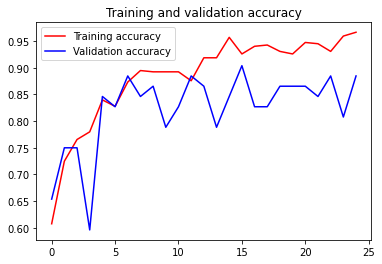

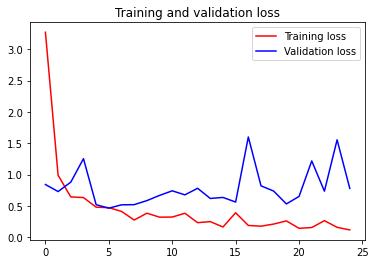

In [ ]:
#----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot  ( epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
# plt.title('Training accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss')
# plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
labels = train_generator.class_indices.keys()
# print(labels)

count_modern = 0
count_traditional = 0
def test_model(source_path, test_set):
  test_set_length = len(test_set)
  count_modern = 0
  count_traditional = 0
  for file_name in test_set:
    img_path = source_path + file_name
    # print(img_path)
    img = image.load_img(img_path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    result = model.predict(images)[0]
    # print(result[0])
    if result[0] * 100 > 50:
      count_modern += 1
    else:
      count_traditional += 1

    plt.imshow(img)
    plt.show()
    
    print(file_name)
    for (label, percentage) in zip(labels, result):
      print("{}: {:.2f}%".format(label, percentage*100))

  print("test_set_length =", test_set_length)
  print("count_modern =", count_modern)
  print("count_traditional =", count_traditional)

modern_batik_path = '/tmp/batik-technique/testing/modern/'
traditional_batik_path = '/tmp/batik-technique/testing/traditional/'
modern_batik_set = os.listdir(modern_batik_path)
traditional_batik_set = os.listdir(traditional_batik_path)

test_model(modern_batik_path, modern_batik_set)
# test_model(traditional_batik_path, traditional_batik_set)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# labels = train_generator.class_indices.keys()

# uploaded = files.upload()

# for file_name in uploaded.keys():
 
#   # predicting images
#   path = file_name
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   x = preprocess_input(x)

#   images = np.vstack([x])
#   proba = model.predict(images)[0]
#   plt.imshow(img)
#   plt.show()
#   for (label, p) in zip(labels, proba):
#     print("{}: {:.2f}%".format(label, p * 100))

Saving 005K01.jpg to 005K01.jpg
dict_keys(['005K01.jpg'])


In [ ]:
# gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/batik_technique_classification_model.h5"
gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/batik_technique_classification_model.h5"
# gdrive_saved_model_path = "/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_3/batik_technique_classification_model.h5"

saved_model_path = "/tmp/saved_model/batik_technique_classification_model.h5"

model.save(saved_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
copyfile(saved_model_path, gdrive_saved_model_path)

'/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all_except_2/batik_technique_classification_model.h5'